<a href="https://colab.research.google.com/github/FatemehAbediK/deep-learning-medical/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection/data

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
import cv2
import os
import numpy as np

In [5]:
image_dir='/content/drive/My Drive/dataset files/brain tumor_kaggle/'

no_tumor_path='/content/drive/MyDrive/dataset files/brain tumor-kaggle/no'
yes_tumor_path= '/content/drive/MyDrive/dataset files/brain tumor-kaggle/yes'

no_tumor=os.listdir(no_tumor_path)
yes_tumor=os.listdir(yes_tumor_path)

In [6]:
##find the name of the path:jpg
print(no_tumor[0])


no267.jpg


In [7]:
#get the   '.jpg'   !!!!

path='no0.jpg'
print(path.split('.')[1])

jpg


In [19]:
dataset=[]
label=[]

for image_name in no_tumor:
    if image_name.endswith('.jpg'):
        img_path = os.path.join(no_tumor_path, image_name)  # Create the full image path
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))
            dataset.append(np.array(img))
            label.append(0)
        else:
            print(f"Warning: Unable to load image {img_path}")

for image_name in yes_tumor:
    if image_name.endswith('.jpg'):
        img_path = os.path.join(yes_tumor_path, image_name)  # Create the full image path
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))
            dataset.append(np.array(img))
            label.append(1)
        else:
            print(f"Warning: Unable to load image {img_path}")

print(label)
print(dataset)

print(len(dataset))
print(len(label))

Streaming output truncated to the last 5000 lines.
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[15, 14, 13],
        [ 7,  5,  5],
        [ 5,  3,  2],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 3, 12,  4],
        [ 4, 11,  8],
        [ 0,  5,  7],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  1, 42],
        [ 0,  1, 46],
        [ 0,  0, 50],
        ...

In [20]:
dataset=np.array(dataset)
label=np.array(label)

In [21]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D
from keras.layers import Activation , Dropout , Flatten , Dense


In [22]:
x_train , x_test , y_train , y_test = train_test_split(dataset , label , test_size=0.2 , random_state=10)

In [23]:
print(x_train.shape)  # number,image_width ,image_height , n_channels

(2407, 64, 64, 3)


In [24]:
x_train=normalize(x_train , axis=1)
x_test=normalize(x_test , axis=1)

In [25]:
#model:

model=Sequential()

model.add(Conv2D(32 , (3,3) , input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32 , (3,3) , kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32 , (3,3) ,  kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,249 (364.25 KB)

 Trainable params: 93,249 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss' , verbose=2 , patience=5 , restore_best_weights=True)
hist=model.fit(x_train , y_train , batch_size=16 , verbose=1 , epochs=10 ,
               validation_data=(x_test , y_test) ,callbacks=callbacks ,  shuffle=False)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.6457 - loss: 0.6092 - val_accuracy: 0.7542 - val_loss: 0.5016
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.7870 - loss: 0.4710 - val_accuracy: 0.7973 - val_loss: 0.4345
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.8453 - loss: 0.3695 - val_accuracy: 0.7990 - val_loss: 0.4519
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.8802 - loss: 0.2921 - val_accuracy: 0.8638 - val_loss: 0.3411
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.9187 - loss: 0.2112 - val_accuracy: 0.8538 - val_loss: 0.4576
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9356 - loss: 0.1626 - val_accuracy: 0.9169 - val_loss: 0.2575
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.9610 - loss: 0.1044 - val_accuracy: 0.9352 - val_loss: 0.2274
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 31s 166ms/step - accuracy: 0.9768 - loss: 0.0714 -

In [31]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
history_data = hist.history

# Initialize a dictionary to store the best parameters
best_params = {}

for key in history_data.keys():
    if 'loss' in key:
        best_epoch = np.argmin(history_data[key])  # For loss, we want the minimum
        best_value = min(history_data[key])
    else:
        best_epoch = np.argmax(history_data[key])  # For accuracy, we want the maximum
        best_value = max(history_data[key])

    # Store the best parameters
    best_params[key] = {
        'best_value': best_value,
        'best_epoch': best_epoch + 1  # Add 1 to convert from 0-based index to 1-based epoch number
    }

# Print the best parameters
for metric, params in best_params.items():
    print(f"Best {metric}: {params['best_value']} at epoch {params['best_epoch']}")

Best accuracy: 0.9891981482505798 at epoch 10
Best loss: 0.03529638424515724 at epoch 10
Best val_accuracy: 0.960132896900177 at epoch 10
Best val_loss: 0.14381521940231323 at epoch 10


meybe get better if we continue with more epochs!

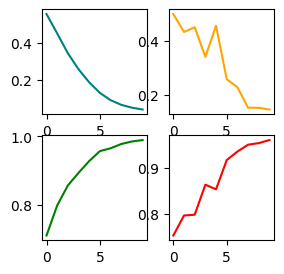

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.subplot(221);plt.plot(hist.history['loss'] , color='teal' , label='loss')
plt.subplot(222);plt.plot(hist.history['val_loss'] , color='orange' , label='val_loss')
plt.subplot(223);plt.plot(hist.history['accuracy'] , color='green' , label='accuracy')
plt.subplot(224);plt.plot(hist.history['val_accuracy'] , color='red' , label='val_accuracy')
plt.show();

In [ ]:
##if you want to do the categorical:

"""
from keras.utils import to_categorical

y_train=to_categorical(y_train , num_classes=2)
y_test=to_categorical(y_test , num_classes=2)

model.add(Dense(2))
activation=softmax
"""